In [13]:
options(repr.plot.width=6, repr.plot.height=6)

## Ej 1

In [14]:
lidar_url = 'http://www.ic.fcen.uba.ar/~anab/lidar.txt'

In [15]:
lidar.datos = read.table(lidar_url, header=T)
lidar.datos.logratio = lidar.datos[,2]
lidar.datos.range = lidar.datos$range

#### Ej 1.1

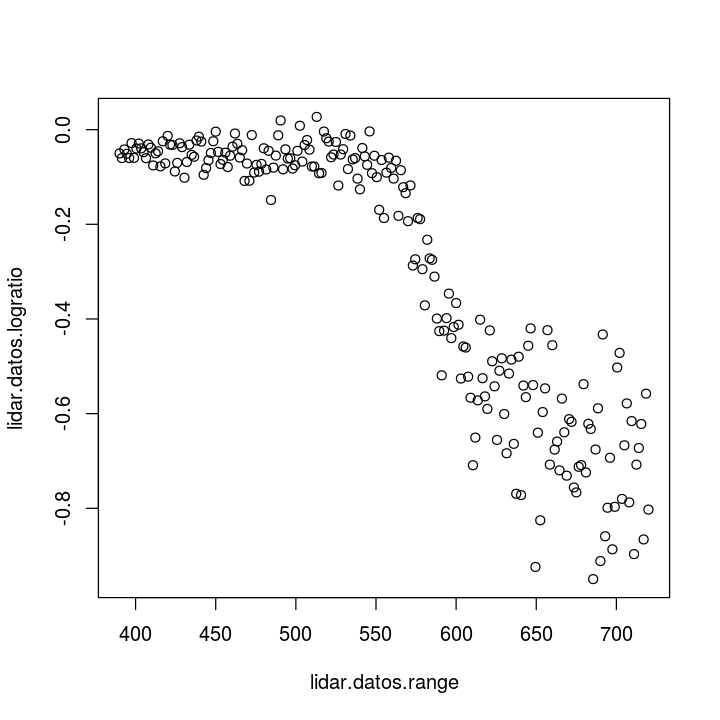

In [16]:
plot(lidar.datos.range, lidar.datos.logratio)

#### Ej 1.2

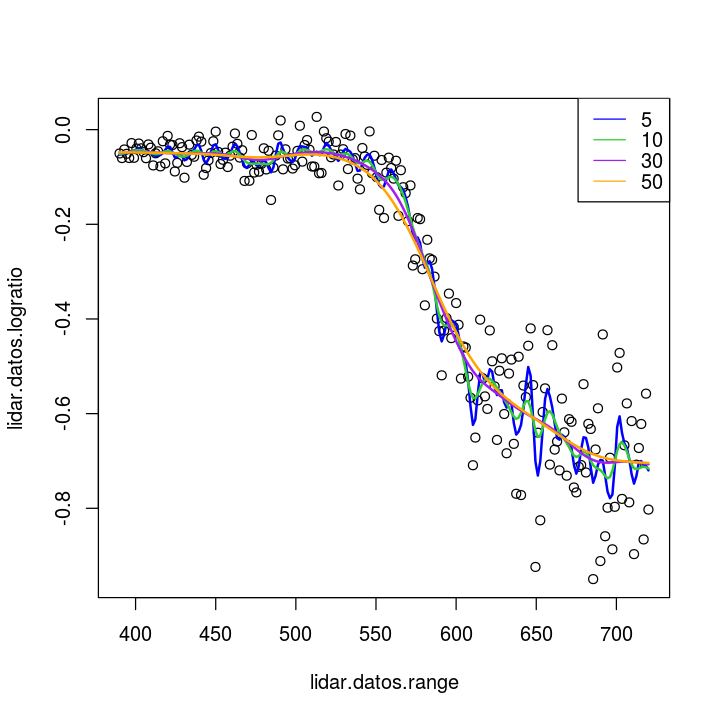

In [29]:
hs = c(5, 10, 30, 50)
plot(lidar.datos.range, lidar.datos.logratio)
colors = c('blue', 'limegreen', 'purple', 'orange')
for (h_idx in 1:length(hs)) {
    lines(
        ksmooth(lidar.datos.range, lidar.datos.logratio, kernel='normal', bandwidth=hs[h_idx]), 
        col=colors[h_idx], lwd=c(2))
}
legend('topright', legend=hs, lty=rep(1, length(hs)), lwd=rep(1, length(hs)), col=colors)

#### Ej 1.3

In [46]:
lidar.ecpp = sapply(hs, function(h) {
    ys = ksmooth(lidar.datos.range, lidar.datos.logratio, kernel='normal', bandwidth=h)$y
    return(c(h, mean((ys - lidar.datos.logratio) ** 2)))
})
lidar.ecpp = data.frame(ecpp=lidar.ecpp[2,], row.names=lidar.ecpp[1,])
lidar.ecpp

,ecpp
5,0.003848877
10,0.005164205
30,0.005956781
50,0.006200361


#### Ej 1.4

In [49]:
lidar.ecpp.cv.hs = seq(3, 165)
lidar.ecpp.cv = sapply(lidar.ecpp.cv.hs, function(h) {
    cv_ecpp = sapply(1:length(lidar.datos.range), function(ex_idx) {
        ys = ksmooth(lidar.datos.range[-ex_idx], lidar.datos.logratio[-ex_idx], 
                     kernel='normal', bandwidth=h,
                     range.x=c(lidar.datos.range[ex_idx], lidar.datos.range[ex_idx]), n.points=1)$y
        (lidar.datos.logratio[ex_idx] - ys) ** 2
    })
    mean(cv_ecpp)
})

In [52]:
lidar.ecpp.cv.h_opt.idx = which.min(lidar.ecpp.cv)
lidar.ecpp.cv.h_opt = lidar.ecpp.cv.hs[lidar.ecpp.cv.h_opt.idx]

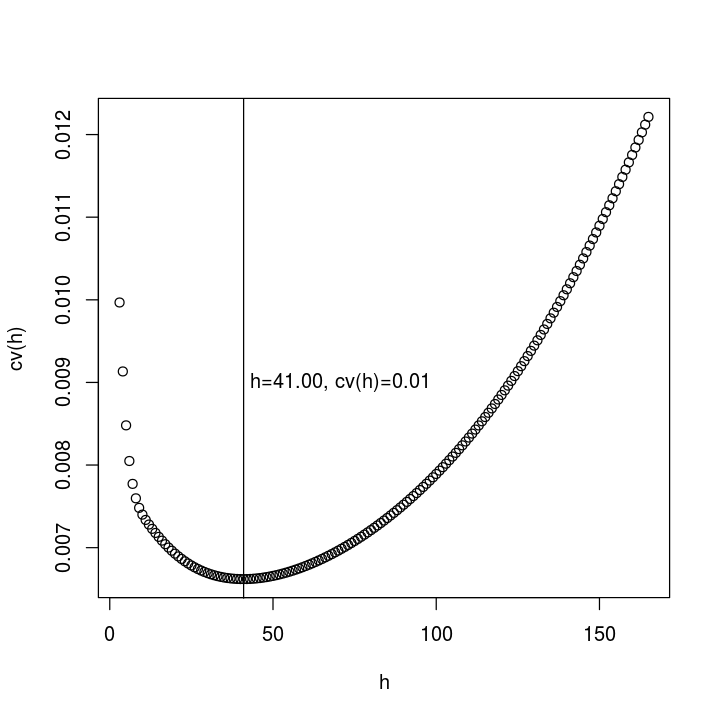

In [60]:
plot(lidar.ecpp.cv.hs, lidar.ecpp.cv, ylab='cv(h)', xlab='h')
lines(c(lidar.ecpp.cv.h_opt, lidar.ecpp.cv.h_opt), c(0, 0.013))
text_ = sprintf(' h=%.2f, cv(h)=%.2f', lidar.ecpp.cv.h_opt, lidar.ecpp.cv[lidar.ecpp.cv.h_opt.idx])
text(lidar.ecpp.cv.h_opt, 0.009, text_, adj=0)

#### Ej 1.5

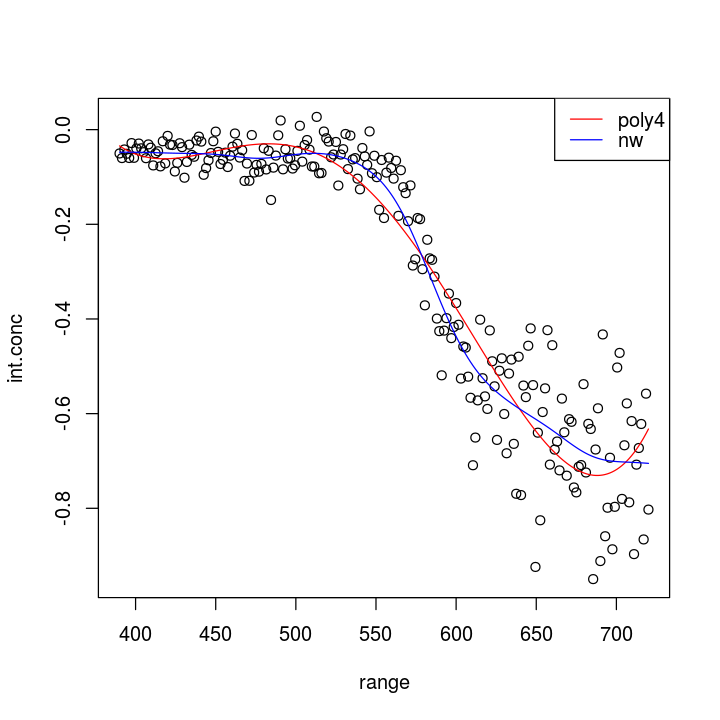

In [73]:
poly4 = lm(lidar.datos.logratio ~ poly(lidar.datos.range, 4))
plot(lidar.datos)
lines(lidar.datos.range, poly4$fitted.values, col='red')
lines(ksmooth(lidar.datos.range, lidar.datos.logratio, kernel='normal', bandwidth=lidar.ecpp.cv.h_opt), 
      col='blue')
legend('topright', legend=c('poly4', 'nw'), lty=rep(1, 2), lwd=rep(1, 2), col=c('red', 'blue'))

#### Ej 1.6

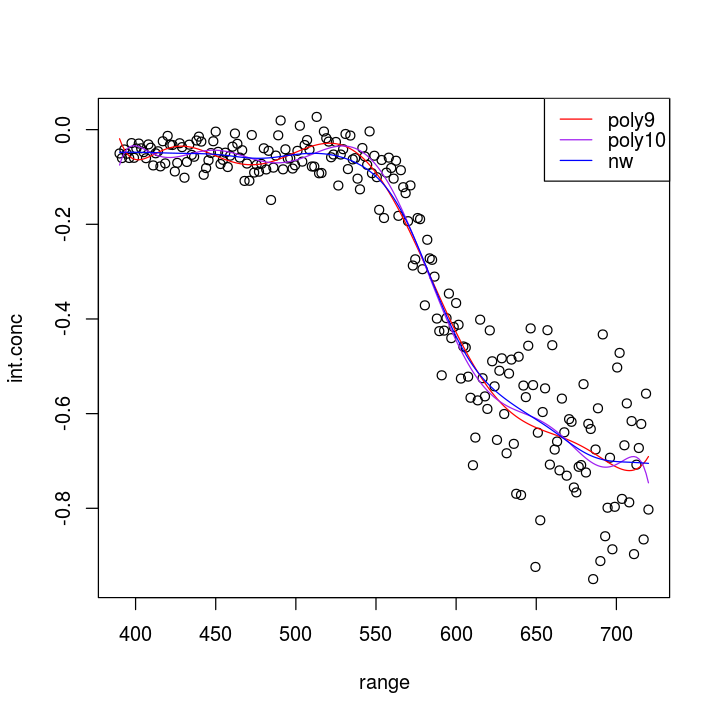

In [72]:
poly9 = lm(lidar.datos.logratio ~ poly(lidar.datos.range, 9))
poly10 = lm(lidar.datos.logratio ~ poly(lidar.datos.range, 10))
plot(lidar.datos)
lines(lidar.datos.range, poly9$fitted.values, col='red')
lines(lidar.datos.range, poly10$fitted.values, col='purple')
lines(ksmooth(lidar.datos.range, lidar.datos.logratio, kernel='normal', bandwidth=lidar.ecpp.cv.h_opt), 
      col='blue')
legend('topright', legend=c('poly9', 'poly10', 'nw'), lty=rep(1, 2), lwd=rep(1, 2), col=c('red', 'purple', 'blue'))

In [92]:
polys = list(poly4, poly9, poly10)
polys.names = c('poly4', 'poly9', 'poly10')
polys.ecpp = sapply(polys, function(p) {
    mean((p$fitted.values - lidar.datos.logratio) ** 2)
})
ecpp.table = cbind(polys.names, polys.ecpp)
ecpp.table = rbind(ecpp.table, c('nw_opt', lidar.ecpp.cv[lidar.ecpp.cv.h_opt.idx]))
colnames(ecpp.table) = c('model', 'cv')
ecpp.table

model,cv
poly4,0.00753968087825577
poly9,0.00626339556727262
poly10,0.00602230716185899
nw_opt,0.00661931197561841
